In [1]:
import pandas as pd


## Load data into pandas DataFrame

In [2]:
def read_data(path):
    # read dictionary into df
    df_data_sentence = pd.read_table(path + 'dictionary.txt')
    
    # The data starts with a phrase of ! and a phrase id of 0 (edited to phase and index) sparated by | and we will saparate them into 2 columns of values
    # phrase and phrase id
    
    df_data_sentence_processed = df_data_sentence['Phase|Index'].str.split('|', expand=True)
    df_data_sentence_processed = df_data_sentence_processed.rename(columns={0:'Phrase', 1: 'phrase_ids'})
    
    # read sentiment labels into data frame each phrase has its own respective sentiment value 
    df_data_sentiment = pd.read_table(path + 'sentiment_labels.txt')
    df_data_sentiment_processed = df_data_sentiment['phrase ids|sentiment values'].str.split('|', expand=True)
    df_data_sentiment_processed = df_data_sentiment_processed.rename(columns={0: 'phrase_ids', 1: 'sentiment_values'})
    
    #combine data frames containing sentence and sentiment
    df_processed_all = df_data_sentence_processed.merge(df_data_sentiment_processed, how='inner', on='phrase_ids')
    
    return df_processed_all

In [3]:
path = 'C:/Users/Rahul K/OneDrive/Desktop/data science/df1/'

In [21]:
# Import test data i.e.. the scraped data from amazon.in
amazon_data = pd.read_csv('C:/Users/Rahul K/OneDrive/Desktop/data science/Amazon_Review.csv')
amazon_data

,Unnamed: 0,Mobile,Coustomer,Review_Title,Review,Star_Rating_of_5
0,0,OnePlusNord,Aman More,A good daily driver.,"Pros:1) Clean and bloatfree OxygenOS, which ...",4.0
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera,It's not very often I leave a critical revie...,3.0
2,2,OnePlusNord,Kiran KS,The original segment of One Plus,Battery usage update: Drains faster than oth...,4.0
3,3,OnePlusNord,Nikhil,*Read before you buy!!*,"Yea..pre-ordered on 28 July, got it on 4 Aug...",5.0
4,4,OnePlusNord,Deblina Roy,Disappointing,Heavily disappointed. So much of hype and th...,2.0
...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :),Elite phones of Samsung are always as good a...,5.0
96,96,Samsung Z flip,Dimple Samtani,Not worth the price,I was excited about this phone. The first ti...,4.0
97,97,Samsung Z flip,Punam,Very bad phone,Very bad and not price worthy . Not to be t...,1.0
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K","Phone is not good, to much folding mark, pla...",1.0


In [4]:
# Load data from the path
read_data(path)

,Phrase,phrase_ids,sentiment_values
0,!,0,0.5
1,! ',22935,0.52778
2,! '',18235,0.5
3,! Alas,179257,0.44444
4,! Brilliant,22936,0.86111
...,...,...,...
239227,zoning ordinances to protect your community fr...,220441,0.13889
239228,zzzzzzzzz,179256,0.19444
239229,élan,220442,0.51389
239230,É,220443,0.5


In [5]:
df_data = pd.read_table(path + 'datasetSentences.txt')

In [6]:
df_data

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."
...,...,...
11850,11851,A real snooze .
11851,11852,No surprises .
11852,11853,We 've seen the hippie-turned-yuppie plot befo...
11853,11854,Her fans walked out muttering words like `` ho...


In [7]:
df_labels = pd.read_table(path + 'datasetSplit.txt')
df_labels_processed = df_labels['sentence_index,splitset_label'].str.split(',', expand=True)
df_labels_processed = df_labels_processed.rename(columns={0: 'sentence_index', 1: 'sentiment_values'})
df_labels_processed['sentence_index'] = pd.to_numeric(df_labels_processed['sentence_index'])


In [8]:
df_labels_processed

,sentence_index,sentiment_values
0,1,1
1,2,1
2,3,2
3,4,2
4,5,2
...,...,...
11850,11851,1
11851,11852,1
11852,11853,1
11853,11854,1


In [33]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Mobile            100 non-null    object 
 2   Coustomer         100 non-null    object 
 3   Star_Rating_of_5  100 non-null    float64
 4   sentence          100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [9]:
df_all_review = df_data.merge(df_labels_processed, how='inner', on='sentence_index')

In [10]:
df_all_review

,sentence_index,sentence,sentiment_values
0,1,The Rock is destined to be the 21st Century 's...,1
1,2,The gorgeously elaborate continuation of `` Th...,1
2,3,Effective but too-tepid biopic,2
3,4,If you sometimes like to go to the movies to h...,2
4,5,"Emerges as something rare , an issue movie tha...",2
...,...,...,...
11850,11851,A real snooze .,1
11851,11852,No surprises .,1
11852,11853,We 've seen the hippie-turned-yuppie plot befo...,1
11853,11854,Her fans walked out muttering words like `` ho...,1


In [22]:
# Compare both the data frames
amazon_data

,Unnamed: 0,Mobile,Coustomer,Review_Title,Review,Star_Rating_of_5
0,0,OnePlusNord,Aman More,A good daily driver.,"Pros:1) Clean and bloatfree OxygenOS, which ...",4.0
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera,It's not very often I leave a critical revie...,3.0
2,2,OnePlusNord,Kiran KS,The original segment of One Plus,Battery usage update: Drains faster than oth...,4.0
3,3,OnePlusNord,Nikhil,*Read before you buy!!*,"Yea..pre-ordered on 28 July, got it on 4 Aug...",5.0
4,4,OnePlusNord,Deblina Roy,Disappointing,Heavily disappointed. So much of hype and th...,2.0
...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :),Elite phones of Samsung are always as good a...,5.0
96,96,Samsung Z flip,Dimple Samtani,Not worth the price,I was excited about this phone. The first ti...,4.0
97,97,Samsung Z flip,Punam,Very bad phone,Very bad and not price worthy . Not to be t...,1.0
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K","Phone is not good, to much folding mark, pla...",1.0


In [23]:
amazon_data['sentence'] = amazon_data[['Review_Title', 'Review']].apply(lambda x: ''.join(x), axis=1)
amazon_data

,Unnamed: 0,Mobile,Coustomer,Review_Title,Review,Star_Rating_of_5,sentence
0,0,OnePlusNord,Aman More,A good daily driver.,"Pros:1) Clean and bloatfree OxygenOS, which ...",4.0,A good daily driver. Pros:1) Clean and bloatf...
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera,It's not very often I leave a critical revie...,3.0,Bad bad camera It's not very often I leave a ...
2,2,OnePlusNord,Kiran KS,The original segment of One Plus,Battery usage update: Drains faster than oth...,4.0,The original segment of One Plus Battery usag...
3,3,OnePlusNord,Nikhil,*Read before you buy!!*,"Yea..pre-ordered on 28 July, got it on 4 Aug...",5.0,*Read before you buy!!* Yea..pre-ordered on 2...
4,4,OnePlusNord,Deblina Roy,Disappointing,Heavily disappointed. So much of hype and th...,2.0,Disappointing Heavily disappointed. So much o...
...,...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :),Elite phones of Samsung are always as good a...,5.0,Samsung never fails to surprise me. :) Elite ...
96,96,Samsung Z flip,Dimple Samtani,Not worth the price,I was excited about this phone. The first ti...,4.0,Not worth the price I was excited about this ...
97,97,Samsung Z flip,Punam,Very bad phone,Very bad and not price worthy . Not to be t...,1.0,Very bad phone Very bad and not price worthy ...
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K","Phone is not good, to much folding mark, pla...",1.0,"Bad Phone, Even if it were under 40K Phone is..."


In [27]:
amazon_data = amazon_data.drop(['Review_Title','Review'], axis = 1)

In [28]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,Star_Rating_of_5,sentence
0,0,OnePlusNord,Aman More,4.0,A good daily driver. Pros:1) Clean and bloatf...
1,1,OnePlusNord,Abhishek Agarwal,3.0,Bad bad camera It's not very often I leave a ...
2,2,OnePlusNord,Kiran KS,4.0,The original segment of One Plus Battery usag...
3,3,OnePlusNord,Nikhil,5.0,*Read before you buy!!* Yea..pre-ordered on 2...
4,4,OnePlusNord,Deblina Roy,2.0,Disappointing Heavily disappointed. So much o...
...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,5.0,Samsung never fails to surprise me. :) Elite ...
96,96,Samsung Z flip,Dimple Samtani,4.0,Not worth the price I was excited about this ...
97,97,Samsung Z flip,Punam,1.0,Very bad phone Very bad and not price worthy ...
98,98,Samsung Z flip,Faizan,1.0,"Bad Phone, Even if it were under 40K Phone is..."


In [43]:
# new columns with sentiment values based on number of stars given in review

sentiment_value = []
for i in range(100):
    if amazon_data['Star_Rating_of_5'][i]>=4.0:
        sentiment_value.append(3)
    elif amazon_data['Star_Rating_of_5'][i] == 3.0:
        sentiment_value.append(2)
    elif amazon_data['Star_Rating_of_5'][i] < 3.0:
        sentiment_value.append(1)
        
amazon_data['sentiment_value'] = sentiment_value

        
        

In [46]:
amazon_data = amazon_data.drop(['Star_Rating_of_5'], axis =1)

In [47]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1
...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :) Elite ...,3
96,96,Samsung Z flip,Dimple Samtani,Not worth the price I was excited about this ...,3
97,97,Samsung Z flip,Punam,Very bad phone Very bad and not price worthy ...,1
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K Phone is...",1


In [11]:
# check for no neg and pos value

df_all_review["sentence"] = df_all_review["sentence"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


In [48]:
amazon_data["sentence"] = amazon_data["sentence"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [12]:
df_all_review

,sentence_index,sentence,sentiment_values
0,1,The Rock is destined to be the 21st Century 's...,1
1,2,The gorgeously elaborate continuation of `` Th...,1
2,3,Effective but too-tepid biopic,2
3,4,If you sometimes like to go to the movies to h...,2
4,5,"Emerges as something rare , an issue movie tha...",2
...,...,...,...
11850,11851,A real snooze .,1
11851,11852,No surprises .,1
11852,11853,We 've seen the hippie-turned-yuppie plot befo...,1
11853,11854,Her fans walked out muttering words like `` ho...,1


### Feature engineering


In [49]:
# Using NLTK module for wordnets

from nltk.corpus import wordnet

In [50]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    


In [51]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


In [52]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_all_review["review_clean"] = df_all_review["sentence"].apply(lambda x: clean_text(x))
amazon_data['review_clean'] = amazon_data['sentence'].apply(lambda x: clean_text(x))


In [53]:
df_all_review

,sentence_index,sentence,sentiment_values,review_clean,neg,neu,pos,compound
0,1,The Rock is destined to be the 21st Century 's...,1,rock destine century new conan go make splash ...,0.000,0.928,0.072,0.3612
1,2,The gorgeously elaborate continuation of `` Th...,1,gorgeously elaborate continuation lord ring tr...,0.000,0.794,0.206,0.8069
2,3,Effective but too-tepid biopic,2,effective too-tepid biopic,0.000,0.594,0.406,0.2617
3,4,If you sometimes like to go to the movies to h...,2,sometimes like go movie fun wasabi good place ...,0.000,0.633,0.367,0.8271
4,5,"Emerges as something rare , an issue movie tha...",2,emerges something rare issue movie honest keen...,0.079,0.676,0.244,0.6592
...,...,...,...,...,...,...,...,...
11850,11851,A real snooze .,1,real snooze,0.000,1.000,0.000,0.0000
11851,11852,No surprises .,1,surprise,0.537,0.000,0.463,-0.0772
11852,11853,We 've seen the hippie-turned-yuppie plot befo...,1,see hippie-turned-yuppie plot enthusiastic cha...,0.100,0.550,0.350,0.8271
11853,11854,Her fans walked out muttering words like `` ho...,1,fan walk mutter word like horrible terrible mu...,0.116,0.704,0.179,0.5135


In [54]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value,review_clean
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3,good daily driver clean bloatfree oxygenos run...
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2,bad bad camera often leave critical review pro...
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3,original segment one plus battery usage update...
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3,read buy yea..pre-ordered july get august pack...
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1,disappoint heavily disappoint much hype camera...
...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :) Elite ...,3,samsung never fail surprise elite phone samsun...
96,96,Samsung Z flip,Dimple Samtani,Not worth the price I was excited about this ...,3,worth price excite phone first time receive fa...
97,97,Samsung Z flip,Punam,Very bad phone Very bad and not price worthy ...,1,bad phone bad price worthy take anyone search
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K Phone is...",1,bad phone even phone good much fold mark plast...


In [18]:
# Analysing the polarity score for each of the model 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_all_review["sentiments"] = df_all_review["sentence"].apply(lambda x: sid.polarity_scores(x))
df_all_review = pd.concat([df_all_review.drop(['sentiments'], axis=1), df_all_review['sentiments'].apply(pd.Series)], axis=1)


In [55]:
# Doing the same for our scraped data set

amazon_data["sentiments"] = amazon_data["sentence"].apply(lambda x: sid.polarity_scores(x))
amazon_data = pd.concat([amazon_data.drop(['sentiments'], axis=1), amazon_data['sentiments'].apply(pd.Series)], axis=1)

In [56]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value,review_clean,neg,neu,pos,compound
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3,good daily driver clean bloatfree oxygenos run...,0.040,0.814,0.146,0.9890
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2,bad bad camera often leave critical review pro...,0.105,0.796,0.099,-0.2105
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3,original segment one plus battery usage update...,0.037,0.893,0.071,0.6697
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3,read buy yea..pre-ordered july get august pack...,0.016,0.813,0.171,0.9910
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1,disappoint heavily disappoint much hype camera...,0.153,0.701,0.145,-0.2677
...,...,...,...,...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :) Elite ...,3,samsung never fail surprise elite phone samsun...,0.049,0.654,0.296,0.8420
96,96,Samsung Z flip,Dimple Samtani,Not worth the price I was excited about this ...,3,worth price excite phone first time receive fa...,0.108,0.673,0.220,0.8469
97,97,Samsung Z flip,Punam,Very bad phone Very bad and not price worthy ...,1,bad phone bad price worthy take anyone search,0.400,0.600,0.000,-0.8748
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K Phone is...",1,bad phone even phone good much fold mark plast...,0.258,0.742,0.000,-0.7101


In [58]:
# add number of characters column
df_all_review["no_chars"] = df_all_review["sentence"].apply(lambda x: len(x))

# add number of words column
df_all_review["no_words"] = df_all_review["sentence"].apply(lambda x: len(x.split(" ")))

In [59]:
# add number of characters column
amazon_data["no_chars"] = amazon_data["sentence"].apply(lambda x: len(x))

# add number of words column
amazon_data["no_words"] = amazon_data["sentence"].apply(lambda x: len(x.split(" ")))

In [61]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [62]:
# using doc to vector conversion and word to vector conversion each word is given a set of value similar to one hot vector

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_all_review["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df_all_review["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df_all_review = pd.concat([df_all_review, doc2vec_df], axis=1)

In [63]:
df_all_review.head()

,sentence_index,sentence,sentiment_values,review_clean,neg,neu,pos,compound,no_chars,no_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,1,The Rock is destined to be the 21st Century 's...,1,rock destine century new conan go make splash ...,0.000,0.928,0.072,0.3612,181,36,-0.072105,0.230025,-0.132662,-0.078218,-0.171255
1,2,The gorgeously elaborate continuation of `` Th...,1,gorgeously elaborate continuation lord ring tr...,0.000,0.794,0.206,0.8069,227,37,0.051432,0.678286,-0.348413,-0.041844,-0.390691
2,3,Effective but too-tepid biopic,2,effective too-tepid biopic,0.000,0.594,0.406,0.2617,30,4,-0.056920,0.122613,-0.128243,-0.065762,-0.138603
3,4,If you sometimes like to go to the movies to h...,2,sometimes like go movie fun wasabi good place ...,0.000,0.633,0.367,0.8271,89,21,0.073291,0.034026,0.026291,0.093275,-0.006962
4,5,"Emerges as something rare , an issue movie tha...",2,emerges something rare issue movie honest keen...,0.079,0.676,0.244,0.6592,113,23,-0.065542,0.083546,0.048557,0.082227,-0.098622


In [64]:
# doing the same with our amazon dataset

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(amazon_data["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = amazon_data["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
amazon_data = pd.concat([amazon_data, doc2vec_df], axis=1)

In [65]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value,review_clean,neg,neu,pos,compound,no_chars,no_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3,good daily driver clean bloatfree oxygenos run...,0.040,0.814,0.146,0.9890,2059,349,-0.169647,0.439961,0.045590,-0.123789,-0.260888
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2,bad bad camera often leave critical review pro...,0.105,0.796,0.099,-0.2105,804,154,-0.061338,0.170452,-0.055462,-0.116889,-0.076176
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3,original segment one plus battery usage update...,0.037,0.893,0.071,0.6697,1308,219,-0.136024,0.356132,0.048813,-0.038367,-0.177909
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3,read buy yea..pre-ordered july get august pack...,0.016,0.813,0.171,0.9910,1469,255,-0.092489,0.263346,0.060561,0.047291,-0.307670
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1,disappoint heavily disappoint much hype camera...,0.153,0.701,0.145,-0.2677,663,115,-0.136258,0.172718,0.026537,0.079383,-0.083679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :) Elite ...,3,samsung never fail surprise elite phone samsun...,0.049,0.654,0.296,0.8420,165,31,0.070187,-0.004263,-0.080400,-0.076046,0.068712
96,96,Samsung Z flip,Dimple Samtani,Not worth the price I was excited about this ...,3,worth price excite phone first time receive fa...,0.108,0.673,0.220,0.8469,348,70,0.051660,0.036273,-0.080025,-0.027752,0.027482
97,97,Samsung Z flip,Punam,Very bad phone Very bad and not price worthy ...,1,bad phone bad price worthy take anyone search,0.400,0.600,0.000,-0.8748,89,22,0.019665,0.119715,-0.014982,-0.054836,0.043063
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K Phone is...",1,bad phone even phone good much fold mark plast...,0.258,0.742,0.000,-0.7101,105,20,0.091734,-0.035265,0.039383,0.032964,0.011796


In [66]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_all_review["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_all_review.index
df_all_review = pd.concat([df_all_review, tfidf_df], axis=1)

In [67]:
df_all_review.head()

,sentence_index,sentence,sentiment_values,review_clean,neg,neu,pos,compound,no_chars,no_words,...,word_ya,word_yarn,word_year,word_yes,word_yet,word_york,word_young,word_yu,word_zhang,word_zone
0,1,The Rock is destined to be the 21st Century 's...,1,rock destine century new conan go make splash ...,0.000,0.928,0.072,0.3612,181,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,The gorgeously elaborate continuation of `` Th...,1,gorgeously elaborate continuation lord ring tr...,0.000,0.794,0.206,0.8069,227,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Effective but too-tepid biopic,2,effective too-tepid biopic,0.000,0.594,0.406,0.2617,30,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,If you sometimes like to go to the movies to h...,2,sometimes like go movie fun wasabi good place ...,0.000,0.633,0.367,0.8271,89,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"Emerges as something rare , an issue movie tha...",2,emerges something rare issue movie honest keen...,0.079,0.676,0.244,0.6592,113,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(amazon_data["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = amazon_data.index
amazon_data = pd.concat([amazon_data, tfidf_df], axis=1)

In [69]:
amazon_data

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value,review_clean,neg,neu,pos,compound,...,word_thing,word_time,word_update,word_use,word_user,word_video,word_well,word_without,word_work,word_would
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3,good daily driver clean bloatfree oxygenos run...,0.040,0.814,0.146,0.9890,...,0.087518,0.000000,0.070571,0.110580,0.000000,0.081279,0.395402,0.000000,0.0,0.000000
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2,bad bad camera often leave critical review pro...,0.105,0.796,0.099,-0.2105,...,0.000000,0.407133,0.000000,0.000000,0.000000,0.000000,0.124436,0.000000,0.0,0.000000
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3,original segment one plus battery usage update...,0.037,0.893,0.071,0.6697,...,0.000000,0.000000,0.060038,0.047038,0.069148,0.000000,0.000000,0.000000,0.0,0.212366
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3,read buy yea..pre-ordered july get august pack...,0.016,0.813,0.171,0.9910,...,0.000000,0.000000,0.000000,0.000000,0.293459,0.097820,0.000000,0.293459,0.0,0.000000
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1,disappoint heavily disappoint much hype camera...,0.153,0.701,0.145,-0.2677,...,0.000000,0.000000,0.220216,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Samsung Z flip,UtkarshPramodGupta,Samsung never fails to surprise me. :) Elite ...,3,samsung never fail surprise elite phone samsun...,0.049,0.654,0.296,0.8420,...,0.000000,0.000000,0.000000,0.263415,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
96,96,Samsung Z flip,Dimple Samtani,Not worth the price I was excited about this ...,3,worth price excite phone first time receive fa...,0.108,0.673,0.220,0.8469,...,0.000000,0.394312,0.000000,0.151670,0.000000,0.000000,0.000000,0.000000,0.0,0.228254
97,97,Samsung Z flip,Punam,Very bad phone Very bad and not price worthy ...,1,bad phone bad price worthy take anyone search,0.400,0.600,0.000,-0.8748,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
98,98,Samsung Z flip,Faizan,"Bad Phone, Even if it were under 40K Phone is...",1,bad phone even phone good much fold mark plast...,0.258,0.742,0.000,-0.7101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [71]:
print(df_all_review.shape)
print(amazon_data.shape)

(11855, 2108)
(100, 109)


In [72]:
df_all_review['sentiment_values'].value_counts(normalize = True)

1    0.720709
2    0.186419
3    0.092872
Name: sentiment_values, dtype: float64

In [75]:
amazon_data['sentiment_value'].value_counts(normalize = True)

3    0.51
1    0.43
2    0.06
Name: sentiment_value, dtype: float64

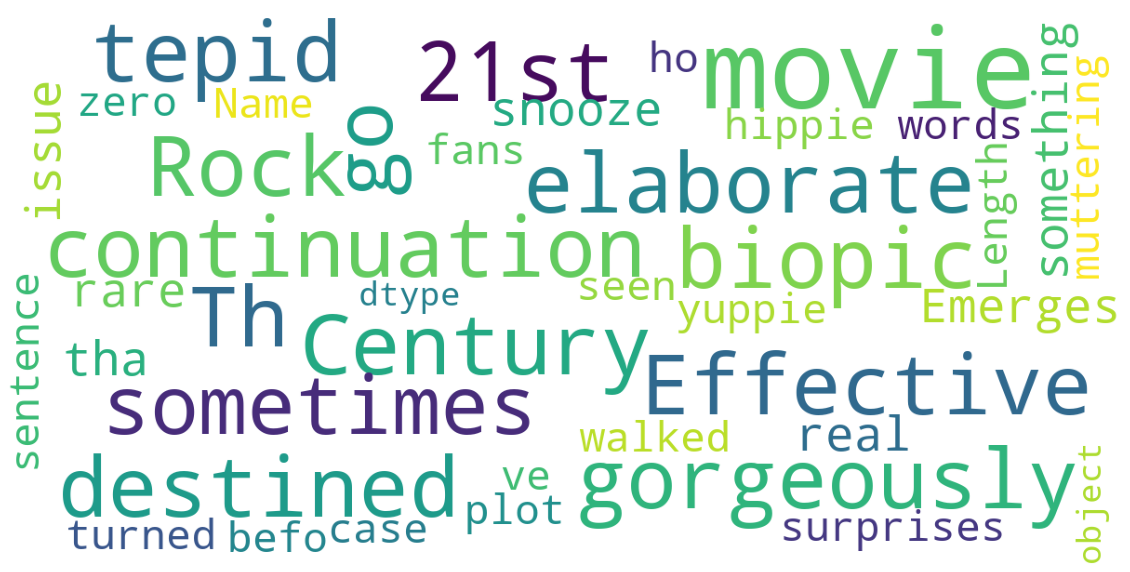

In [76]:
# plot a word cloud 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_all_review["sentence"])

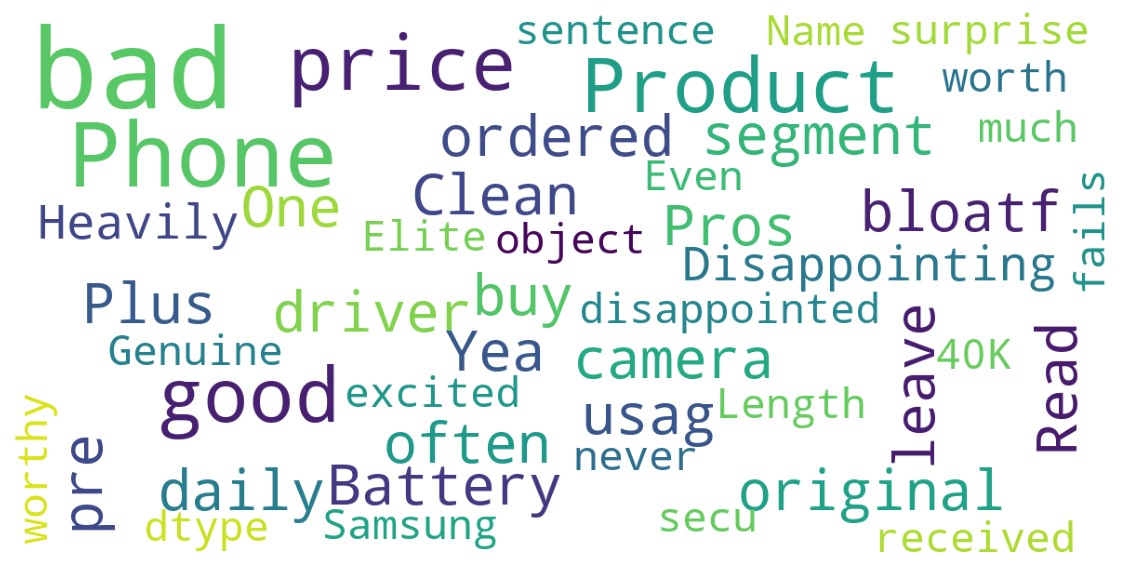

In [77]:
show_wordcloud(amazon_data["sentence"])

In [78]:
df_all_review[df_all_review["no_words"] >= 5].sort_values("pos", ascending = False)[["sentence", "pos"]].head(10)

,sentence,pos
560,A pleasant romantic comedy .,1.000
212,"A smart , sweet and playful romantic comedy .",0.932
4846,A surprisingly sweet and gentle comedy .,0.914
4942,"Exhilarating , funny and fun .",0.899
1119,"A warm , funny , engaging film .",0.878
5585,"A wry , affectionate delight .",0.872
11635,... a true delight .,0.870
298,A wonderful character-based comedy .,0.861
11624,"Boisterous , heartfelt comedy .",0.857
3456,"A pleasing , often-funny comedy .",0.855


In [79]:
df_all_review[df_all_review["no_words"] >= 5].sort_values("neg", ascending = False)[["sentence", "neg"]].head(10)

,sentence,neg
10087,Stress ` dumb . ',1.000
9917,"A horrible , 99-minute stink bomb .",0.904
6314,"No , I hate it .",0.855
9608,"Sad nonsense , this .",0.853
8869,Just a bloody mess .,0.844
11432,Eckstraordinarily lame and Severely boring .,0.802
9079,"... pitiful , slapdash disaster .",0.785
9690,Very stupid and annoying .,0.769
10309,"A dull , dumb and derivative horror film .",0.764
11817,-LRB- A -RRB- crushing disappointment .,0.744


In [83]:
amazon_data[amazon_data["no_words"] >= 5].sort_values("pos", ascending = False)[["sentence", "pos"]].head(10)

,sentence,pos
88,Very Nice Very Nice Mobile good all,0.700
59,Cute A cute mobile...super performance and go...,0.690
62,Best Smart Phone under 25000/- Awesome camera...,0.622
99,Genuine Product Good product received in secu...,0.620
27,Top notch as per the price Best of the best,0.593
94,Definitely not recommended. Bad Product. Bett...,0.569
12,Solid premium phone from Apple Awesome Phone....,0.553
45,Only Oneplus One of the best Oneplus phone ev...,0.417
30,Kidney or phone ? I sold my kidney for this p...,0.382
86,"More than 5star,best budget mobile in India. ...",0.368


In [84]:
amazon_data[amazon_data["no_words"] >= 5].sort_values("neg", ascending = False)[["sentence", "neg"]].head(10)

,sentence,neg
54,So bad Ist very bad,0.717
97,Very bad phone Very bad and not price worthy ...,0.400
58,"Waste of money This mobile is not good , so m...",0.334
52,Worst Heating problem.....waste of hard money...,0.333
16,"iPhone 11 Defective product,got heat up withi...",0.309
6,Totally dissatisfied. No AR support. I bought...,0.260
98,"Bad Phone, Even if it were under 40K Phone is...",0.258
84,"Feeling cheated Defective product received, i...",0.254
72,The phone got dead just after the initial setu...,0.246
35,Useless phone without Snapdragon Chipset! Not...,0.245


In [ ]:
import seaborn as sns

for x in [1,2,3]:
    subset = df_all_review[df_all_review['sentiment_values'] == x]
    
    # Draw the density plot
    if x == 3:
        label = "Good reviews"
    elif x==2:
        label = "neutral review"
    else:
        label = "Bad reviews"
    sns.distplot(subset['indexer'],hist = False, label = label)

In [85]:
df_all_review.head()

,sentence_index,sentence,sentiment_values,review_clean,neg,neu,pos,compound,no_chars,no_words,...,word_ya,word_yarn,word_year,word_yes,word_yet,word_york,word_young,word_yu,word_zhang,word_zone
0,1,The Rock is destined to be the 21st Century 's...,1,rock destine century new conan go make splash ...,0.000,0.928,0.072,0.3612,181,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,The gorgeously elaborate continuation of `` Th...,1,gorgeously elaborate continuation lord ring tr...,0.000,0.794,0.206,0.8069,227,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Effective but too-tepid biopic,2,effective too-tepid biopic,0.000,0.594,0.406,0.2617,30,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,If you sometimes like to go to the movies to h...,2,sometimes like go movie fun wasabi good place ...,0.000,0.633,0.367,0.8271,89,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"Emerges as something rare , an issue movie tha...",2,emerges something rare issue movie honest keen...,0.079,0.676,0.244,0.6592,113,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
amazon_data.head()

,Unnamed: 0,Mobile,Coustomer,sentence,sentiment_value,review_clean,neg,neu,pos,compound,...,word_thing,word_time,word_update,word_use,word_user,word_video,word_well,word_without,word_work,word_would
0,0,OnePlusNord,Aman More,A good daily driver. Pros:1) Clean and bloatf...,3,good daily driver clean bloatfree oxygenos run...,0.040,0.814,0.146,0.9890,...,0.087518,0.000000,0.070571,0.110580,0.000000,0.081279,0.395402,0.000000,0.0,0.000000
1,1,OnePlusNord,Abhishek Agarwal,Bad bad camera It's not very often I leave a ...,2,bad bad camera often leave critical review pro...,0.105,0.796,0.099,-0.2105,...,0.000000,0.407133,0.000000,0.000000,0.000000,0.000000,0.124436,0.000000,0.0,0.000000
2,2,OnePlusNord,Kiran KS,The original segment of One Plus Battery usag...,3,original segment one plus battery usage update...,0.037,0.893,0.071,0.6697,...,0.000000,0.000000,0.060038,0.047038,0.069148,0.000000,0.000000,0.000000,0.0,0.212366
3,3,OnePlusNord,Nikhil,*Read before you buy!!* Yea..pre-ordered on 2...,3,read buy yea..pre-ordered july get august pack...,0.016,0.813,0.171,0.9910,...,0.000000,0.000000,0.000000,0.000000,0.293459,0.097820,0.000000,0.293459,0.0,0.000000
4,4,OnePlusNord,Deblina Roy,Disappointing Heavily disappointed. So much o...,1,disappoint heavily disappoint much hype camera...,0.153,0.701,0.145,-0.2677,...,0.000000,0.000000,0.220216,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### Model prepration

In [106]:
# feature selection
target = "sentiment_values"
ignore_cols = [target, "sentence", "review_clean"]
features = [c for c in df_all_review.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all_review[features], df_all_review[target], test_size = 0.20, random_state = 42)

In [108]:
mob_target = "sentiment_value"
ign_col = [mob_y_test, "sentence", "review_clean", 'Coustomer', 'Mobile']
mob_features = [c for c in amazon_data.columns if c not in ign_col]

X_training, X_dev, X_training, y_dev = train_test_split(amazon_data[mob_features], amazon_data[mob_target], test_size = 0.2, random_state = 42)

In [109]:
print(f'Training Shape: {X_train.shape}')
print(f'test Shape: {X_test.shape}')

print(f'Mobile train Shape: {X_training.shape}')
print(f'Mobile test Shape: {X_dev.shape}')


Training Shape: (9484, 2105)
test Shape: (2371, 2105)
Mobile train Shape: (80, 104)
Mobile test Shape: (20, 104)


In [110]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
0,sentence_index,0.465655
9,doc2vec_vector_2,0.011105
7,doc2vec_vector_0,0.010604
8,doc2vec_vector_1,0.010585
11,doc2vec_vector_4,0.010534
10,doc2vec_vector_3,0.010312
5,no_chars,0.010072
4,compound,0.010011
6,no_words,0.009313
2,neu,0.008685


In [115]:
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf2.fit(X_training, y_training)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": mob_features, "importance": rf2.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
1,neg,0.094240
3,pos,0.093757
4,compound,0.078187
6,no_words,0.038837
5,no_chars,0.031758
11,doc2vec_vector_4,0.031301
8,doc2vec_vector_1,0.030112
29,word_display,0.028986
9,doc2vec_vector_2,0.024075
46,word_good,0.023955


In [119]:
y_pred1 = rf.predict(X_test)
y_pred1

array(['2', '1', '2', ..., '1', '1', '3'], dtype=object)

In [116]:
y_pred = rf2.predict(X_dev)
y_pred

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3],
      dtype=int64)

In [117]:
from sklearn.metrics import r2_score

In [118]:
r2_score(y_dev, y_pred)

0.2676056338028169

In [120]:
r2_score(y_test, y_pred1)

0.848342466601003